In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/flags/flags-train.arff'
test_path = '../datasets/flags/flags-test.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", train_labels.shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", test_labels.shape)

100%|██████████| 65/65 [00:00<00:00, 2775.96it/s]

Train data shape:  (129, 1, 114)
Train labels shape:  (129, 7)
Test data shape:  (65, 1, 114)
Test labels shape:  (65, 7)


## DSLL Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (129, 1, 114)
Train Labels shape is  (129, 3)
Classes trained are: 0 to 3


  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 3, class 0 neurons = 4
Class 2, class 1 neurons = 5, class 0 neurons = 2


100%|██████████| 4000/4000 [1:53:03<00:00,  1.70s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.302564  |
| zero_one_loss       | 0.646154  |
| one_error           | 0.0615385 |
| micro av. jaccard   | 0.584507  |
| macro av. jaccard   | 0.546154  |
| micro av. precision | 0.715517  |
| macro av. precision | 0.700488  |
| micro av. recall    | 0.761468  |
| macro av. recall    | 0.719416  |
| micro av. f1        | 0.737778  |
| macro av. f1        | 0.693957  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.302564  |
| zero_one_loss       | 0.646154  |
| one_error           | 0.0615385 |
| micro av. jaccard   | 0.584507  |
| macro av. jaccard   | 0.546154  |
| micro av. precision | 0.715517  |
| macro av. precis

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 6, class 0 neurons = 6
Class 2, class 1 neurons = 7, class 0 neurons = 2
Class 3, class 1 neurons = 5, class 0 neurons = 4
Class 4, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 4000/4000 [3:35:35<00:00,  3.23s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.215385  |
| zero_one_loss       | 0.353846  |
| one_error           | 0.0769231 |
| micro av. jaccard   | 0.72      |
| macro av. jaccard   | 0.690104  |
| micro av. precision | 0.791209  |
| macro av. precision | 0.787326  |
| micro av. recall    | 0.888889  |
| macro av. recall    | 0.85      |
| micro av. f1        | 0.837209  |
| macro av. f1        | 0.811899  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.252308 |
| zero_one_loss       | 0.753846 |
| one_error           | 0        |
| micro av. jaccard   | 0.659751 |
| macro av. jaccard   | 0.627275 |
| micro av. precision | 0.757143 |
| macro av. precision | 0.

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 9, class 0 neurons = 8
Class 2, class 1 neurons = 11, class 0 neurons = 2
Class 3, class 1 neurons = 6, class 0 neurons = 5
Class 4, class 1 neurons = 6, class 0 neurons = 4
Class 5, class 1 neurons = 3, class 0 neurons = 5
Class 6, class 1 neurons = 3, class 0 neurons = 5


100%|██████████| 4000/4000 [3:59:15<00:00,  3.59s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.207692  |
| zero_one_loss       | 0.384615  |
| one_error           | 0.0307692 |
| micro av. jaccard   | 0.129032  |
| macro av. jaccard   | 0.0833333 |
| micro av. precision | 0.5       |
| macro av. precision | 0.285714  |
| micro av. recall    | 0.148148  |
| macro av. recall    | 0.0952381 |
| micro av. f1        | 0.228571  |
| macro av. f1        | 0.142857  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.250549 |
| zero_one_loss       | 0.830769 |
| one_error           | 0        |
| micro av. jaccard   | 0.580882 |
| macro av. jaccard   | 0.455264 |
| micro av. precision | 0.741784 |
| macro av. precision | 0.

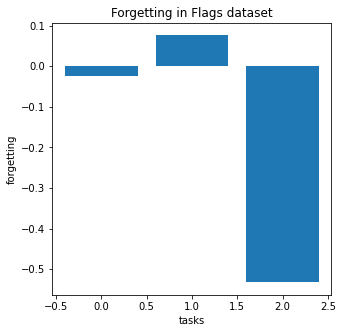

In [3]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': None, 'labels': [3, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (129, 1, 114)
Train Labels shape is  (129, 3)
Classes trained are: 0 to 3


  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 3, class 0 neurons = 5


100%|██████████| 4000/4000 [38:02<00:00,  1.75it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.205128 |
| zero_one_loss       | 0.476923 |
| one_error           | 0        |
| micro av. jaccard   | 0.578947 |
| macro av. jaccard   | 0.321181 |
| micro av. precision | 0.763889 |
| macro av. precision | 0.456101 |
| micro av. recall    | 0.705128 |
| macro av. recall    | 0.396825 |
| micro av. f1        | 0.733333 |
| macro av. f1        | 0.39089  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.205128 |
| zero_one_loss       | 0.476923 |
| one_error           | 0        |
| micro av. jaccard   | 0.578947 |
| macro av. jaccard   | 0.321181 |
| micro av. precision | 0.763889 |
| macro av. precision | 0.456101 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 5, class 0 neurons = 4
Class 4, class 1 neurons = 3, class 0 neurons = 4


100%|██████████| 4000/4000 [58:40<00:00,  1.14it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.261538 |
| zero_one_loss       | 0.523077 |
| one_error           | 0        |
| micro av. jaccard   | 0.540541 |
| macro av. jaccard   | 0.541667 |
| micro av. precision | 0.701754 |
| macro av. precision | 0.705556 |
| micro av. recall    | 0.701754 |
| macro av. recall    | 0.701852 |
| micro av. f1        | 0.701754 |
| macro av. f1        | 0.701754 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.218462 |
| zero_one_loss       | 0.676923 |
| one_error           | 0        |
| micro av. jaccard   | 0.57485  |
| macro av. jaccard   | 0.446943 |
| micro av. precision | 0.75     |
| macro av. precision | 0.707619 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 3, class 0 neurons = 6
Class 3, class 1 neurons = 6, class 0 neurons = 5
Class 4, class 1 neurons = 6, class 0 neurons = 6
Class 5, class 1 neurons = 5, class 0 neurons = 2
Class 6, class 1 neurons = 5, class 0 neurons = 2


100%|██████████| 4000/4000 [1:21:50<00:00,  1.23s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.292308  |
| zero_one_loss       | 0.492308  |
| one_error           | 0.0923077 |
| micro av. jaccard   | 0.631068  |
| macro av. jaccard   | 0.587449  |
| micro av. precision | 0.755814  |
| macro av. precision | 0.757875  |
| micro av. recall    | 0.792683  |
| macro av. recall    | 0.742424  |
| micro av. f1        | 0.77381   |
| macro av. f1        | 0.726121  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.246154 |
| zero_one_loss       | 0.830769 |
| one_error           | 0        |
| micro av. jaccard   | 0.588235 |
| macro av. jaccard   | 0.480199 |
| micro av. precision | 0.744186 |
| macro av. precision | 0.

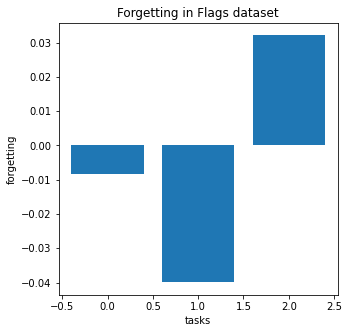

In [4]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': None, 'labels': [3, 2, 2]},
    'seed': 3,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (129, 1, 114)
Train Labels shape is  (129, 3)
Classes trained are: 0 to 3


  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 5, class 0 neurons = 4


100%|██████████| 4000/4000 [39:02<00:00,  1.71it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.179487 |
| zero_one_loss       | 0.430769 |
| one_error           | 0        |
| micro av. jaccard   | 0.672897 |
| macro av. jaccard   | 0.460069 |
| micro av. precision | 0.782609 |
| macro av. precision | 0.524884 |
| micro av. recall    | 0.827586 |
| macro av. recall    | 0.566667 |
| micro av. f1        | 0.804469 |
| macro av. f1        | 0.541266 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.179487 |
| zero_one_loss       | 0.430769 |
| one_error           | 0        |
| micro av. jaccard   | 0.672897 |
| macro av. jaccard   | 0.460069 |
| micro av. precision | 0.782609 |
| macro av. precision | 0.524884 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 6, class 0 neurons = 5
Class 3, class 1 neurons = 5, class 0 neurons = 2
Class 4, class 1 neurons = 3, class 0 neurons = 4


100%|██████████| 4000/4000 [58:54<00:00,  1.13it/s] 


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.269231 |
| zero_one_loss       | 0.430769 |
| one_error           | 0.107692 |
| micro av. jaccard   | 0.660194 |
| macro av. jaccard   | 0.626923 |
| micro av. precision | 0.715789 |
| macro av. precision | 0.69359  |
| micro av. recall    | 0.894737 |
| macro av. recall    | 0.851852 |
| micro av. f1        | 0.795322 |
| macro av. f1        | 0.763158 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.227692 |
| zero_one_loss       | 0.753846 |
| one_error           | 0        |
| micro av. jaccard   | 0.649289 |
| macro av. jaccard   | 0.532888 |
| micro av. precision | 0.740541 |
| macro av. precision | 0.680166 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 5
Class 2, class 1 neurons = 7, class 0 neurons = 5
Class 3, class 1 neurons = 5, class 0 neurons = 2
Class 4, class 1 neurons = 6, class 0 neurons = 6
Class 5, class 1 neurons = 3, class 0 neurons = 5
Class 6, class 1 neurons = 5, class 0 neurons = 2


100%|██████████| 4000/4000 [1:21:35<00:00,  1.22s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.338462 |
| zero_one_loss       | 0.569231 |
| one_error           | 0.107692 |
| micro av. jaccard   | 0.301587 |
| macro av. jaccard   | 0.275641 |
| micro av. precision | 0.678571 |
| macro av. precision | 0.642857 |
| micro av. recall    | 0.351852 |
| macro av. recall    | 0.322511 |
| micro av. f1        | 0.463415 |
| macro av. f1        | 0.420635 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.250549 |
| zero_one_loss       | 0.830769 |
| one_error           | 0        |
| micro av. jaccard   | 0.580882 |
| macro av. jaccard   | 0.470724 |
| micro av. precision | 0.741784 |
| macro av. precision | 0.677489 |
| mi

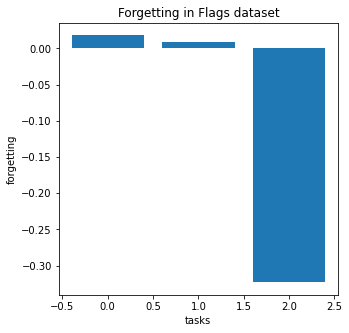

In [5]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': None, 'labels': [3, 2, 2]},
    'seed': 4,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)